<a href="https://colab.research.google.com/github/lourrdesmoreno/Agente-que-Resuelve-problema/blob/master/pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [5]:
! wget https://raw.githubusercontent.com/lourrdesmoreno/casas/main/Datoslimpio2%20.csv

--2020-11-03 04:11:49--  https://raw.githubusercontent.com/lourrdesmoreno/casas/main/Datoslimpio2%20.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48183 (47K) [text/plain]
Saving to: ‘Datoslimpio2 .csv’

Datoslimpio2 .csv   100%[===================>]  47.05K  --.-KB/s    in 0.03s   

2020-11-03 04:11:49 (1.83 MB/s) - ‘Datoslimpio2 .csv’ saved [48183/48183]



In [6]:
data = pd.read_csv("Datoslimpio2 .csv")
data

,Numero,Ubicación,Nombre,Disponibilidad,precio de Venta,Precio de Alquiler,Recamaras,Baños,Dimensión,Tipo de vivienda,vivienda nueva / de segunda
0,1,Bella Vista,RIVAGE,ALQUILER,"$2,000.00",NaN,2.0,2.0,177,APARTAMENTOS,NaN
1,1,Bella Vista,WATERS ON THE BAY,ALQUILER,"$1,700.00",NaN,2.0,2.0,123,APARTAMENTOS,NaN
2,1,Bella Vista,YOO,ALQUILER,"$2,300.00",NaN,2.0,2.0,181,APARTAMENTOS,NaN
3,2,Calidonia,WHITE,VENTA,"$250,000.00",NaN,2.0,2.0,119,APARTAMENTOS,DE SEGUNDA
4,3,Ancón,YACHT CLUB,ALQUILER,"$2,600.00",NaN,3.0,3.0,179,APARTAMENTOS,NaN
...,...,...,...,...,...,...,...,...,...,...,...
548,4,San Francisco,LATORRACA,ALQUILER,"$1,300.00",NaN,3.0,3.0,113,APARTAMENTOS,NaN
549,4,San Francisco,PREMIUM TOWER,VENTA,"$425,000.00",NaN,3.0,3.0,179,APARTAMENTOS,NUEVO
550,4,San Francisco,PACIFIC BAY,VENTALQUILER,"$530,000.00",NaN,3.0,2.0,239,APARTAMENTOS,NUEVO
551,4,San Francisco,LATORRACA,VENTA,"$260,000.00",NaN,3.0,3.0,113,APARTAMENTOS,DE SEGUNDA


In [7]:
clean_data = {"Tipo de vivienda": {"APARTAMENTOS": 1, "CASAS": 2},
              "Disponibilidad": {"VENTA": 1,"ALQUILER": 2,"VENTALQUILER": 3}}
 
data.replace(clean_data, inplace=True)
data

,Numero,Ubicación,Nombre,Disponibilidad,precio de Venta,Precio de Alquiler,Recamaras,Baños,Dimensión,Tipo de vivienda,vivienda nueva / de segunda
0,1,Bella Vista,RIVAGE,2,"$2,000.00",NaN,2.0,2.0,177,1,NaN
1,1,Bella Vista,WATERS ON THE BAY,2,"$1,700.00",NaN,2.0,2.0,123,1,NaN
2,1,Bella Vista,YOO,2,"$2,300.00",NaN,2.0,2.0,181,1,NaN
3,2,Calidonia,WHITE,1,"$250,000.00",NaN,2.0,2.0,119,1,DE SEGUNDA
4,3,Ancón,YACHT CLUB,2,"$2,600.00",NaN,3.0,3.0,179,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
548,4,San Francisco,LATORRACA,2,"$1,300.00",NaN,3.0,3.0,113,1,NaN
549,4,San Francisco,PREMIUM TOWER,1,"$425,000.00",NaN,3.0,3.0,179,1,NUEVO
550,4,San Francisco,PACIFIC BAY,3,"$530,000.00",NaN,3.0,2.0,239,1,NUEVO
551,4,San Francisco,LATORRACA,1,"$260,000.00",NaN,3.0,3.0,113,1,DE SEGUNDA


In [8]:
from sklearn.model_selection import train_test_split
# Split dataset in training and test datasets
X_train, X_test = train_test_split(data, test_size=0.2, random_state=6) 
y_train =X_train["Disponibilidad"]
y_test = X_test["Disponibilidad"]
y_train

544    1
232    3
402    3
467    2
241    1
      ..
318    2
362    3
335    1
365    1
227    2
Name: Disponibilidad, Length: 442, dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Numero                       553 non-null    int64  
 1   Ubicación                    553 non-null    object 
 2   Nombre                       553 non-null    object 
 3   Disponibilidad               553 non-null    object 
 4   precio de Venta              551 non-null    object 
 5   Precio de Alquiler           49 non-null     object 
 6   Recamaras                    552 non-null    float64
 7   Baños                        552 non-null    float64
 8   Dimensión                    553 non-null    int64  
 9   Tipo de vivienda             553 non-null    int64  
 10  vivienda nueva / de segunda  373 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 47.6+ KB


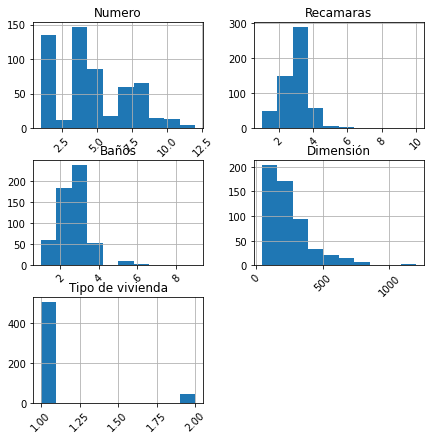

In [10]:
from matplotlib import pyplot as plt
data.hist(figsize=(7,7), xrot=45)
plt.show()

In [11]:
data.describe(include=['object'])

,Ubicación,Nombre,Disponibilidad,precio de Venta,Precio de Alquiler,vivienda nueva / de segunda
count,553,553,553,551,49,373
unique,13,334,9,249,29,2
top,San Francisco,YOO,1,"$1,600.00","$1,500.00",NUEVO
freq,113,18,276,10,4,199


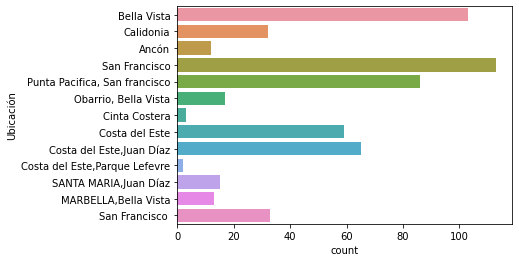

In [12]:
import seaborn as sns
sns.countplot(y = 'Ubicación', data=data)

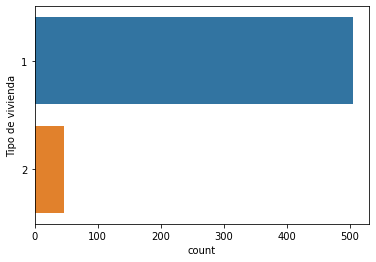

In [13]:
import seaborn as sns
sns.countplot(y = 'Tipo de vivienda', data=data)

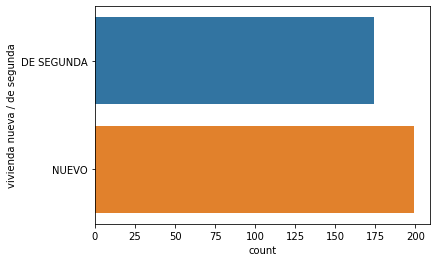

In [14]:
import seaborn as sns
sns.countplot(y = 'vivienda nueva / de segunda', data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


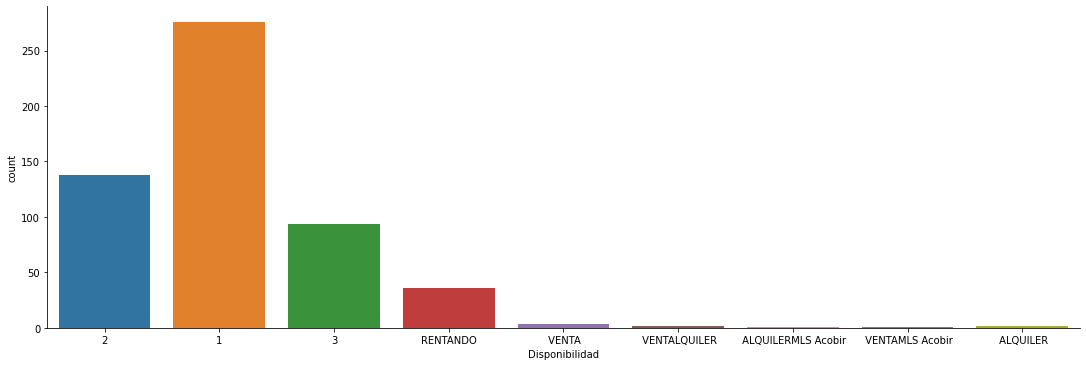

In [15]:
import seaborn as sb
sb.factorplot('Disponibilidad',data=data,kind="count", aspect=3)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


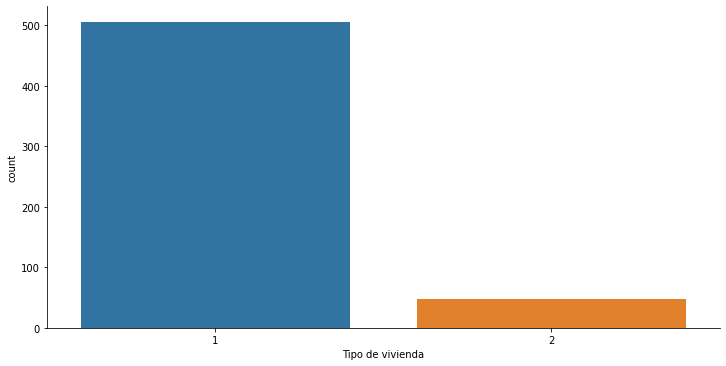

In [16]:
import seaborn as sb
sb.factorplot('Tipo de vivienda',data=data,kind="count", aspect=2)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


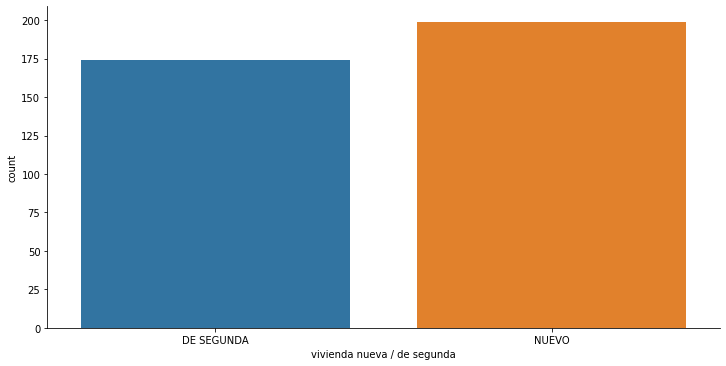

In [17]:
import seaborn as sb
sb.factorplot('vivienda nueva / de segunda',data=data,kind="count", aspect=2)


In [18]:
! wget https://raw.githubusercontent.com/lourrdesmoreno/casas/main/salarios3.csv

--2020-11-03 04:15:54--  https://raw.githubusercontent.com/lourrdesmoreno/casas/main/salarios3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 723 [text/plain]
Saving to: ‘salarios3.csv’

salarios3.csv       100%[===================>]     723  --.-KB/s    in 0s      

2020-11-03 04:15:55 (43.0 MB/s) - ‘salarios3.csv’ saved [723/723]



In [19]:
import pandas as pd
data2 = pd.read_csv("salarios3.csv")
data2

,usuarios,salarios
0,1,2145
1,2,2488
2,3,1866
3,4,1342
4,5,2627
...,...,...
75,76,2908
76,77,2990
77,78,2418
78,79,2890


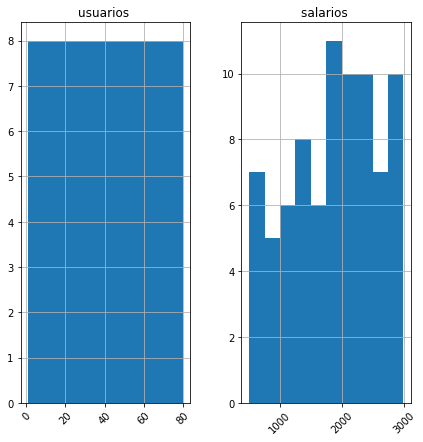

In [20]:
from matplotlib import pyplot as plt
data2.hist(figsize=(7,7), xrot=45)
plt.show()

In [21]:
! wget https://raw.githubusercontent.com/lourrdesmoreno/casas/main/rating.csv

--2020-11-03 04:17:20--  https://raw.githubusercontent.com/lourrdesmoreno/casas/main/rating.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 890 [text/plain]
Saving to: ‘rating.csv’

rating.csv          100%[===================>]     890  --.-KB/s    in 0s      

2020-11-03 04:17:21 (47.1 MB/s) - ‘rating.csv’ saved [890/890]



In [24]:
import pandas as pd
data3 = pd.read_csv("rating.csv")
data3

,usuarios,salarios,rating
0,1,2145,5
1,2,2488,5
2,3,1866,4
3,4,1342,3
4,5,2627,6
...,...,...,...
75,76,2908,6
76,77,2990,6
77,78,2418,5
78,79,2890,6


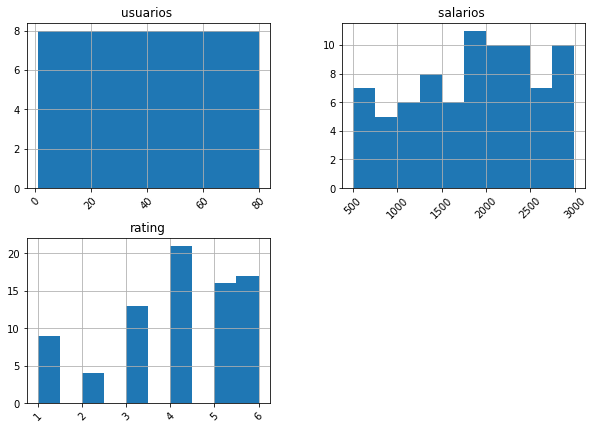

In [25]:
from matplotlib import pyplot as plt
data3.hist(figsize=(10,7), xrot=45)
plt.show()

In [26]:
data3.head()

,usuarios,salarios,rating
0,1,2145,5
1,2,2488,5
2,3,1866,4
3,4,1342,3
4,5,2627,6


(array([ 9.,  4.,  0., 13., 21.,  0., 16., 17.]),
 array([1.   , 1.625, 2.25 , 2.875, 3.5  , 4.125, 4.75 , 5.375, 6.   ]),
 <a list of 8 Patch objects>)

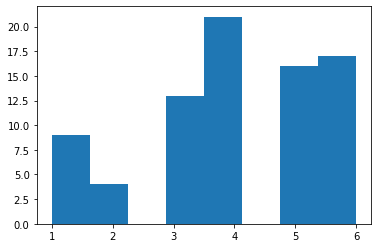

In [27]:
plt.hist(data3.rating,bins=8)

In [28]:
pip install scikit-surprise

     |████████████████████████████████| 11.8MB 2.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670949 sha256=bd57d9482080a474d5167607a044384dc56f39f0235c6809fb022d56501b7456
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
df_train = pd.read_csv('Datolimpios2.csv',
                         sep='\t',
                         names=['userid', 'itemid', 'rating', 'timestamp'],
                         header=None)
df_train.head()